## Damped Harmonic Oscillator(Linear 2D ODE)

In [ ]:
pip install pysindy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 3.1 MB/s 


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

from scipy.integrate import solve_ivp
from scipy.io import loadmat

from pysindy.utils import linear_damped_SHO
import pysindy as ps

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(1000)  # Seed for reproducibility

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

Linear 2D ODE
The first example shows a demonstration of SINDy on a linear two-dimensional damped harmonic oscillator.

We generate training data by integrating the following linear system of differential equations with initial condtion $(2,0)$.

$$ \frac{d}{dt} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix} -0.1 & 2 \\ -2 & -0.1 \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} $$

In [ ]:
# Generate training data

# Generate training data
dt = 0.001
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(linear_damped_SHO, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [ ]:
print("total number of samples:",len(x_train))

total number of samples: 100000


In [ ]:
#finding the best hyperparameters

model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)

search.fit(x_train)

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.001}
(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


In [ ]:
# Fit the model with best hyperparameters

poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train, t=dt)
model.print()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


The above equations are same as the equations used to generate our data

In [ ]:
# Simulate and plot the results
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)
plot_kws1 = dict(linewidth=1)

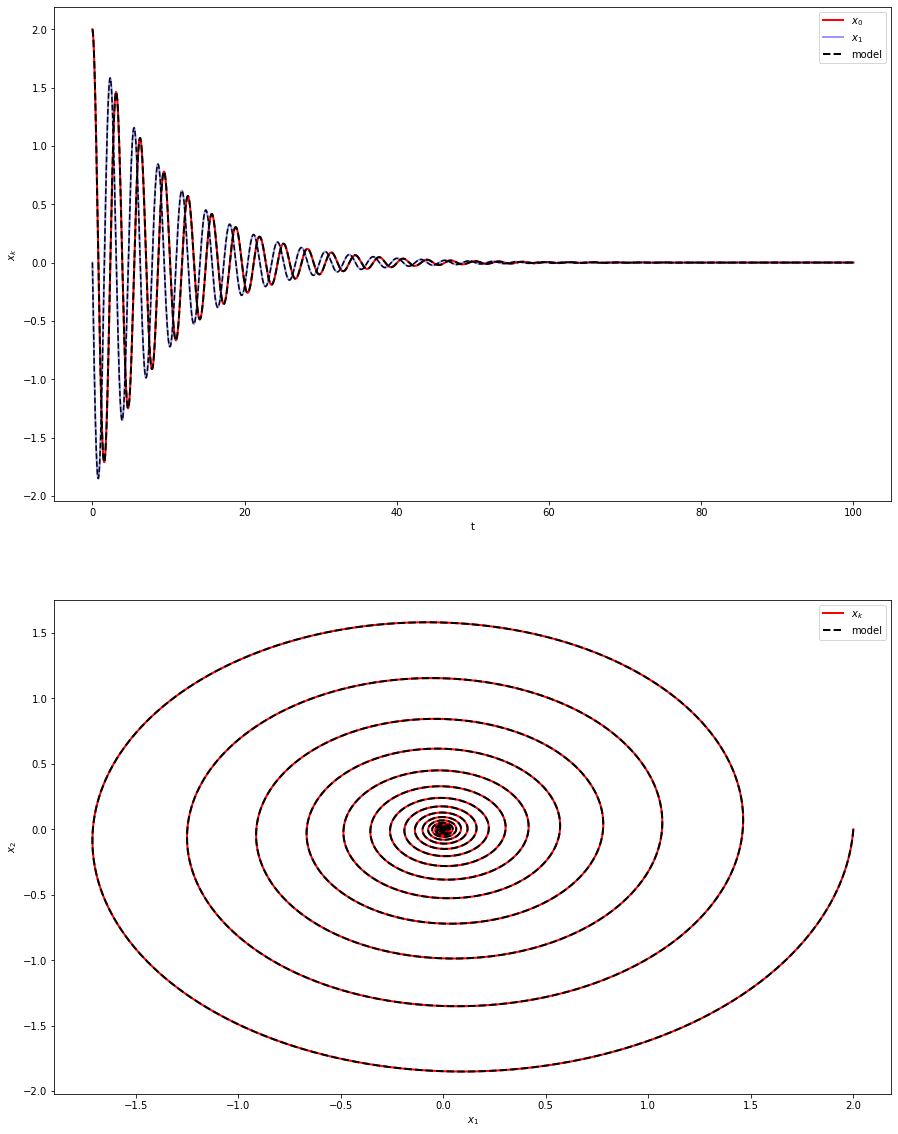

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 20))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

From the above graphs we can say that simulated data/trajectory by the model is exactly overlapping with the original data/trajectory

### Observations for varying levels of noise

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


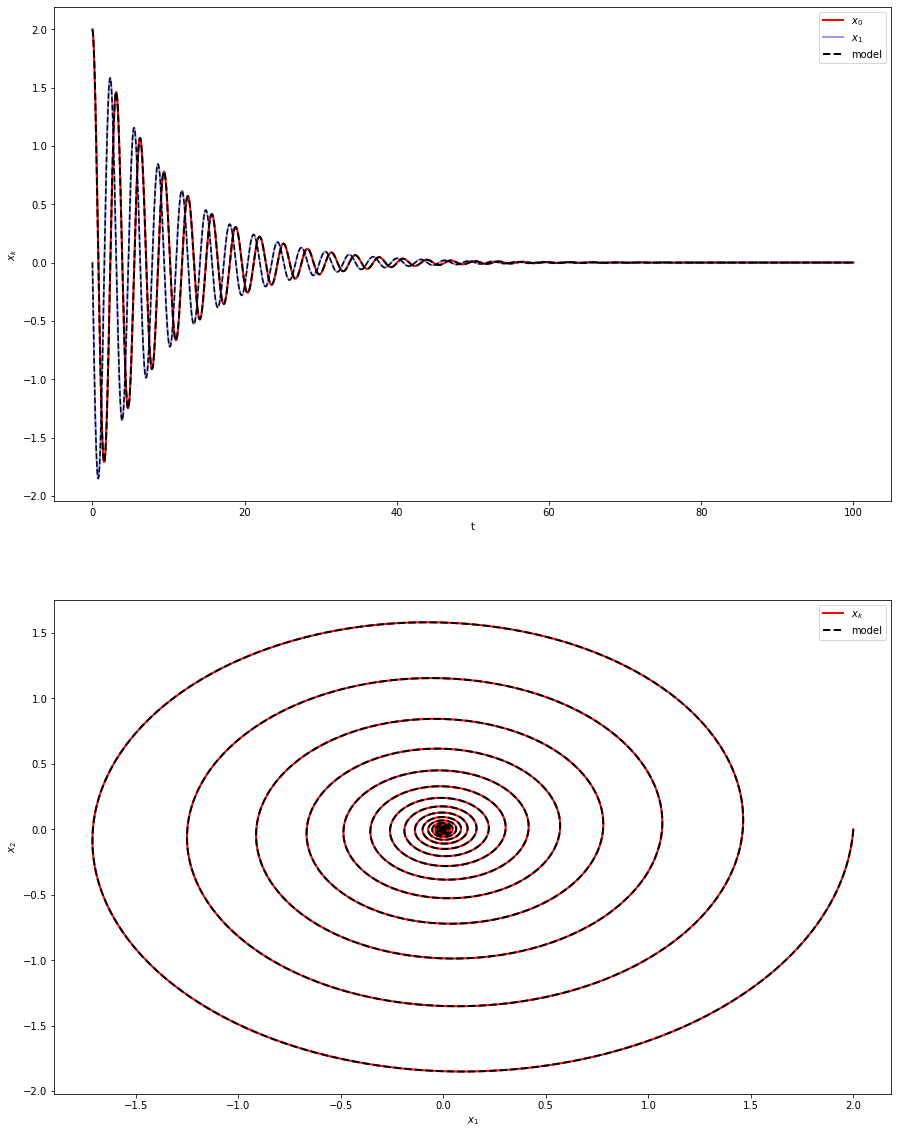

In [ ]:
#adding noise on a scale of 1e-4
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-4, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

(x0)' = -0.101 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


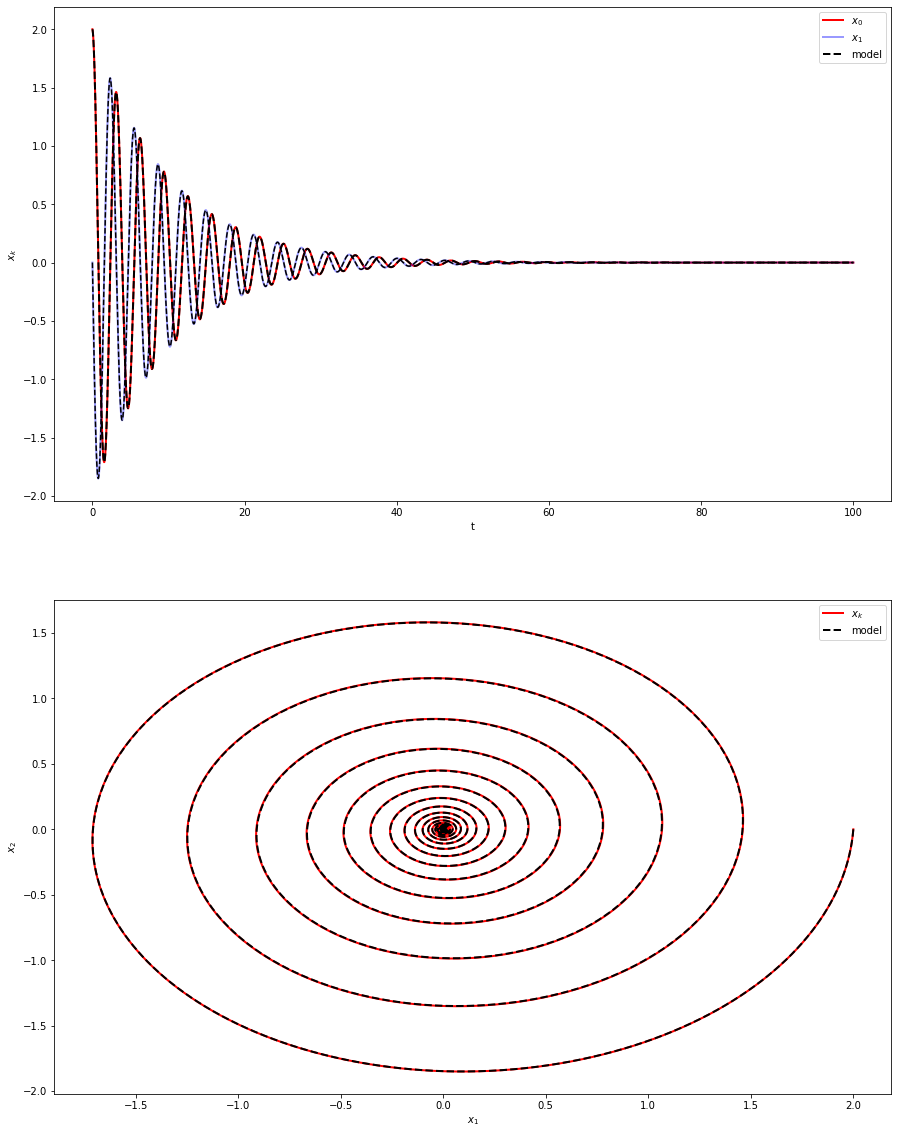

In [ ]:
# adding noise on a scale of 1e-3
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-3, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

(x0)' = -0.099 x0 + 1.997 x1
(x1)' = -1.996 x0 + -0.100 x1


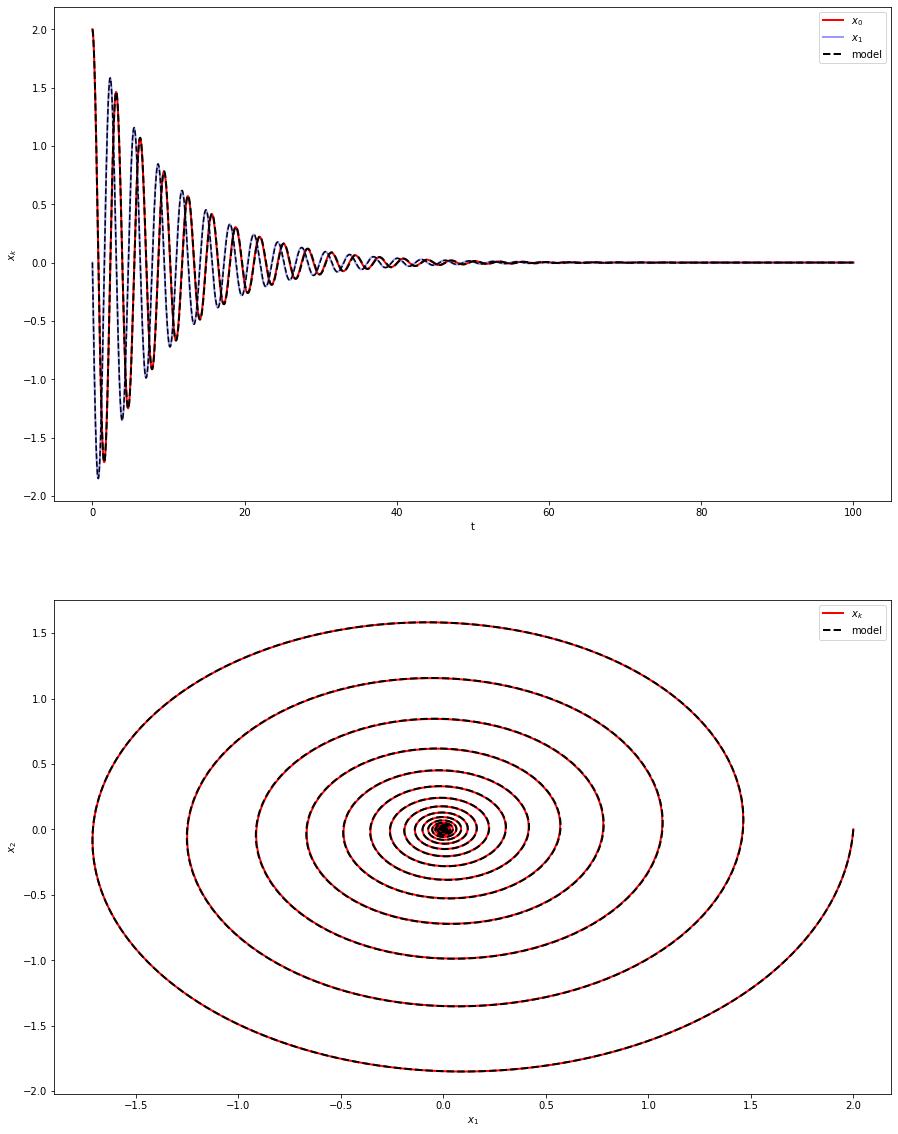

In [ ]:
# adding noise on a scale of 1e-2
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-2, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

(x0)' = -0.002 1 + -0.053 x0 + 1.897 x1
(x1)' = 0.004 1 + -1.844 x0 + -0.090 x1


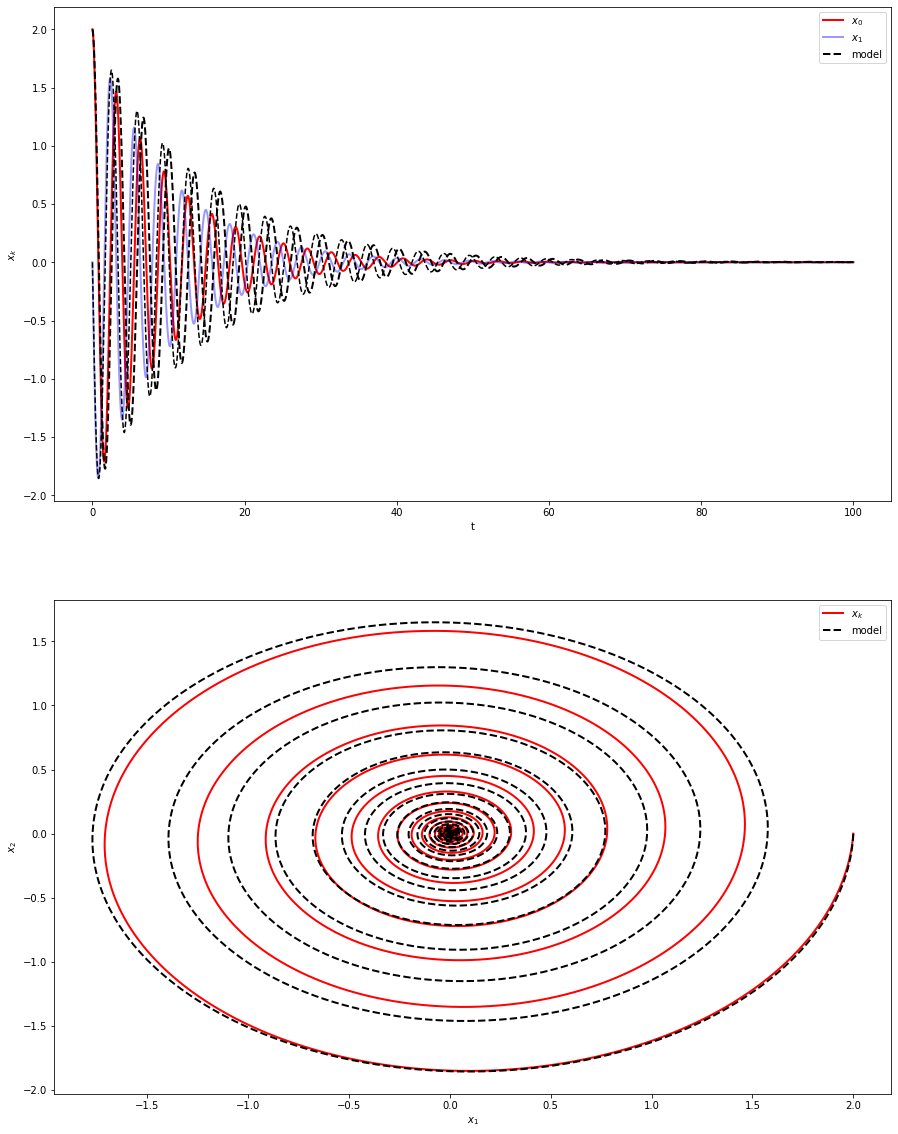

In [ ]:
# adding noise on a scale of 1e-1
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-1, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

(x0)' = 0.043 1 + -0.046 x0 + 4.761 x1
(x1)' = 0.019 1 + -4.774 x0 + -0.026 x1


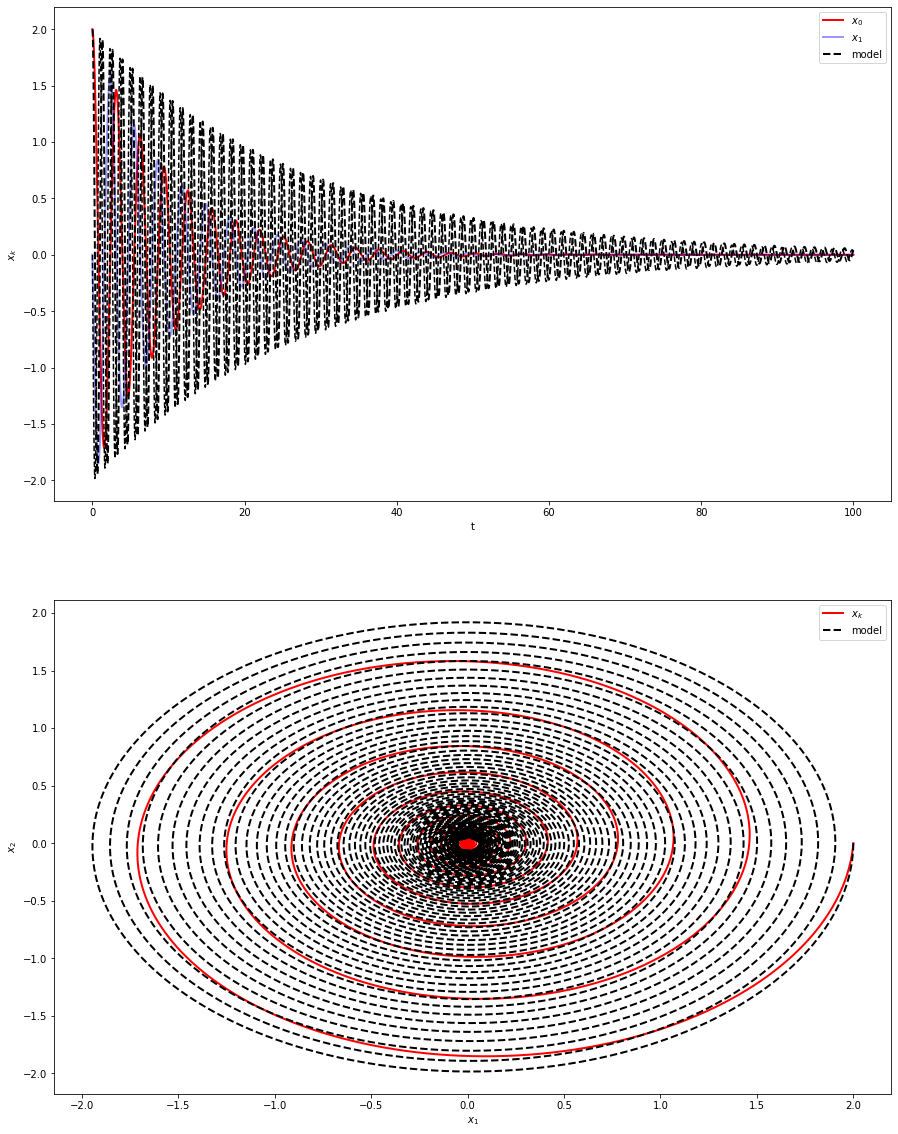

In [ ]:
# adding noise on a scale of 1
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-0, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(2, 1, figsize=(15, 20))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

from the above graphs we can see that the our model is able to accurately simulate the trajectories upto when the scale of noise is e^-2 and with further increase in scale of noise and same amount of data samples model couldn't identify the correct dynamics of the system

### Trying to find amonut of data required for a particular level of noise

no noise

In [ ]:
# considering only 0.1% of the samples without any noise i.e, 100 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:100])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': <pysindy.feature_library.fourier_library.FourierLibrary object at 0x7fa3df75beb0>, 'optimizer__threshold': 0.001}
(x0)' = -0.028 sin(1 x0) + -5.642 cos(1 x0) + 1.733 sin(1 x1) + -2.522 cos(1 x1)
(x1)' = -2.718 sin(1 x0) + 1.083 cos(1 x0) + -0.207 sin(1 x1) + -1.078 cos(1 x1)


In [ ]:
# considering only 0.2% of the samples without any noise i.e, 200 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:200])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.01}
(x0)' = -0.005 1 + -0.098 x0 + 1.999 x1 + 0.001 x1^2
(x1)' = 0.452 1 + -1.986 x0 + -0.072 x1 + -0.120 x0^2 + -0.003 x0 x1 + -0.116 x1^2


In [ ]:
# considering only 0.3% of the samples without any noise i.e, 300 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:300])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.01}
(x0)' = -0.001 1 + -0.100 x0 + 2.000 x1
(x1)' = 0.021 1 + -1.999 x0 + -0.099 x1 + -0.006 x0^2 + -0.006 x1^2


In [ ]:
# considering only 0.4% of the samples without any noise i.e, 400 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:400])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.01}
(x0)' = -0.030 1 + -0.101 x0 + 1.998 x1 + 0.008 x0^2 + 0.008 x1^2
(x1)' = 0.021 1 + -1.999 x0 + -0.099 x1 + -0.006 x0^2 + -0.005 x1^2


In [ ]:
# considering only 0.5% of the samples without any noise i.e, 500 samples of 100,000
#finding the best hyperparameters

model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:500])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.01}
(x0)' = -0.009 1 + -0.100 x0 + 1.999 x1 + 0.002 x0^2 + 0.002 x1^2
(x1)' = 0.008 1 + -2.000 x0 + -0.100 x1 + -0.002 x0^2 + -0.002 x1^2


In [ ]:
# considering only 1.05% of the samples without any noise i.e, 1050 samples of 100,000
#finding the best hyperparameters

model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:1050])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.001}
(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


noise of sacale e-4

In [ ]:
### adding noise on a scale of 1e-4
poly_order = 1
threshold = 0.001
x = x_train[:1650]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-4, size=x.shape), t=dt, quiet=True)
model.print()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


noise of scale e-3

In [ ]:
### adding noise on a scale of 1e-3 
poly_order = 1
threshold = 0.001
x = x_train[:6000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-3, size=x.shape), t=dt, quiet=True)
model.print()


(x0)' = -0.100 x0 + 2.001 x1
(x1)' = -1.999 x0 + -0.100 x1


noise of scale e-2

In [ ]:
### adding noise on a scale of 1e-2
poly_order = 1
threshold = 0.001
x = x_train[:50000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-2, size=x.shape), t=dt, quiet=True)
model.print()


(x0)' = -0.102 x0 + 1.998 x1
(x1)' = -1.997 x0 + -0.100 x1


noise of scale e-1

In [ ]:
### adding noise on a scale of 1e-1
poly_order = 1
threshold = 0.001
x = x_train[:100000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-1, size=x.shape), t=dt, quiet=True)
model.print()

(x0)' = 0.003 1 + -0.034 x0 + 1.702 x1
(x1)' = -0.002 1 + -1.791 x0 + -0.083 x1


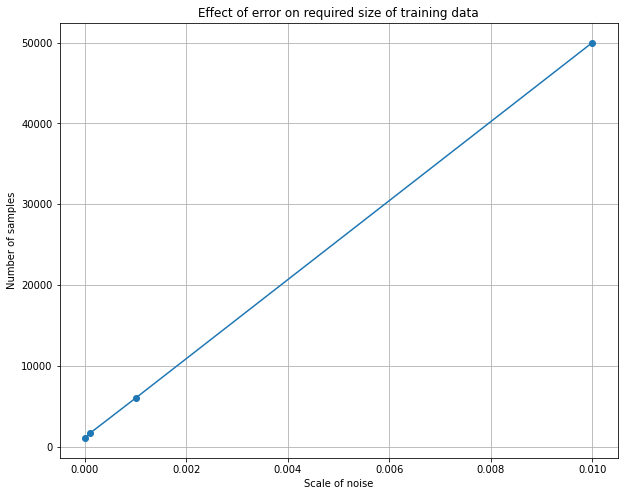

In [17]:
x = [0,10**-4,10**-3,10**-2]
y = [1050,1650,6000,50000]

fig = plt.figure(figsize=(10, 8))
plt.plot(x,y,marker='o')
plt.xlabel("Scale of noise")
plt.ylabel("Number of samples")
plt.title('Effect of error on required size of training data')
plt.grid(True)
fig.show() 